# Pizza Resturant Analytics

We're going to answer the following questions:
1. The most popular Pizza Resturant Chains and types of Pizzas
2. The State's with the most Pizza Resturants and the Average Price per State.
3. Where are Pizza Resturants Located?

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read pizza data
pizza = pd.read_csv("data/8358_1.csv")
pizza.head()

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,22.50,...,USD,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,18.95,...,USD,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,12.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood
3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55.0,Brentwood
4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55.0,Brentwood


In [4]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3510 non-null   object 
 1   address             3510 non-null   object 
 2   categories          3510 non-null   object 
 3   city                3510 non-null   object 
 4   country             3510 non-null   object 
 5   keys                3510 non-null   object 
 6   latitude            3510 non-null   float64
 7   longitude           3510 non-null   float64
 8   menuPageURL         610 non-null    object 
 9   menus.amountMax     2948 non-null   float64
 10  menus.amountMin     2948 non-null   float64
 11  menus.currency      2951 non-null   object 
 12  menus.dateSeen      3510 non-null   object 
 13  menus.description   1526 non-null   object 
 14  menus.name          3510 non-null   object 
 15  name                3510 non-null   object 
 16  postal

In [5]:
# extract interested columns
pizza_sub = pizza.copy()[['id', 'city', 'address', 'postalCode', 
                          'menus.name','latitude', 'longitude',
                          'menus.amountMax', 'menus.amountMin']]
pizza_sub.info()
pizza_sub.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3510 non-null   object 
 1   city             3510 non-null   object 
 2   address          3510 non-null   object 
 3   postalCode       3484 non-null   object 
 4   menus.name       3510 non-null   object 
 5   latitude         3510 non-null   float64
 6   longitude        3510 non-null   float64
 7   menus.amountMax  2948 non-null   float64
 8   menus.amountMin  2948 non-null   float64
dtypes: float64(4), object(5)
memory usage: 246.9+ KB


,id,city,address,postalCode,menus.name,latitude,longitude,menus.amountMax,menus.amountMin
0,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Bianca Pizza,44.102665,-121.300797,22.50,15.50
1,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Cheese Pizza,44.102665,-121.300797,18.95,18.95
2,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00
3,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00
4,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00


### Most popular Resturant

In [6]:
pizza.head()

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,22.50,...,USD,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,18.95,...,USD,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,12.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood
3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55.0,Brentwood
4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55.0,Brentwood


In [7]:
pizza_name_df_count= pizza.groupby('name').agg(count=('id', 'count')).reset_index().sort_values('count',ascending=False)
pizza_name_df_count

,name,count
732,Sicilia's Pizzeria,96
371,J & G Restaurant,55
162,Casey's General Store,43
832,The Pizza Joint,36
569,North End Pizzeria,34
...,...,...
432,Land Sharks Pizza Co,1
431,Lake Bowl Inc,1
430,Laishley Crab House,1
426,La Hacienda Taqueria,1


Text(0.5, 1.0, 'Pizzerias with more than 20 different pizzas')

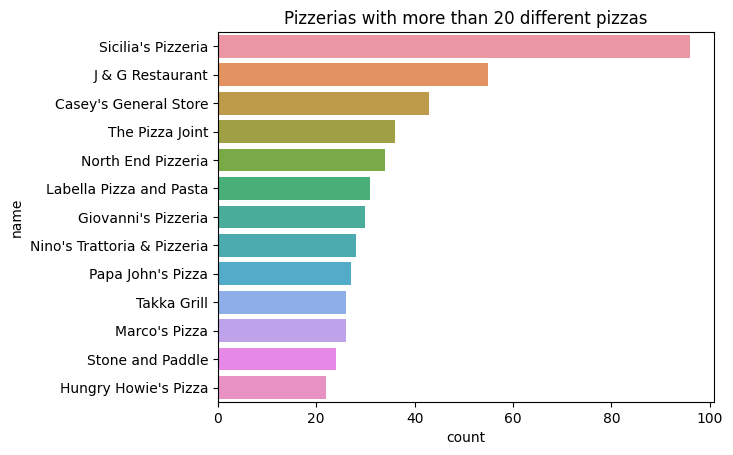

In [8]:
sns.barplot(data=pizza_name_df_count[pizza_name_df_count['count']>20], y='name', x='count')
plt.title("Pizzerias with more than 20 different pizzas")

### Most Popular Pizza Name

In [9]:
pizza_sub.head()

,id,city,address,postalCode,menus.name,latitude,longitude,menus.amountMax,menus.amountMin
0,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Bianca Pizza,44.102665,-121.300797,22.50,15.50
1,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Cheese Pizza,44.102665,-121.300797,18.95,18.95
2,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00
3,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00
4,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00


In [10]:
# drop duplicates
pizza_sub = pizza_sub.drop_duplicates(subset=['id', 'menus.name'])
pizza_sub.head()

,id,city,address,postalCode,menus.name,latitude,longitude,menus.amountMax,menus.amountMin
0,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Bianca Pizza,44.102665,-121.300797,22.50,15.50
1,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Cheese Pizza,44.102665,-121.300797,18.95,18.95
2,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00
3,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00
4,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00


In [11]:
# count the pizza names
names_of_pizza = pizza_sub['menus.name'].value_counts().to_frame().reset_index()
names_of_pizza

,menus.name,count
0,Cheese Pizza,130
1,White Pizza,74
2,Pizza,62
3,Margherita Pizza,60
4,Hawaiian Pizza,53
...,...,...
1593,Pizza Turnover,1
1594,Margarita Sicilian Pizza,1
1595,Eggplant Parmigiana Sicilian Pizza,1
1596,Chicken Parmigiana Sicilian Pizza,1


Text(0.5, 1.0, 'Top 20 most common pizzas')

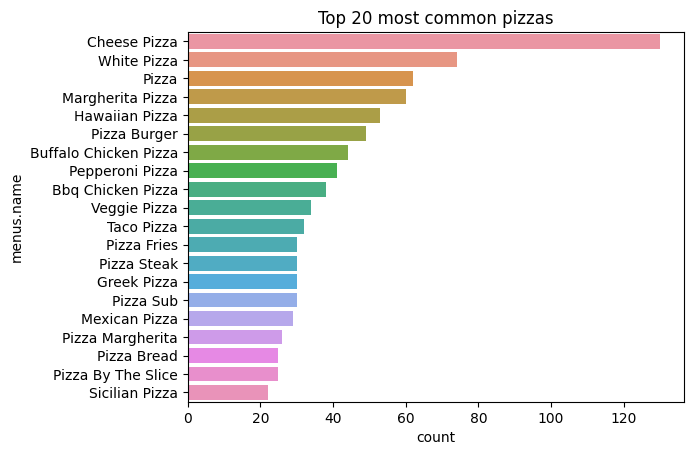

In [12]:
sns.barplot(data=names_of_pizza[0:20], y='menus.name', x='count')
plt.title("Top 20 most common pizzas")

# 2. Get the State information for each pizza restaurant

In [13]:
pizza.head()

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,22.50,...,USD,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,18.95,...,USD,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,12.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood
3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55.0,Brentwood
4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55.0,Brentwood


In [14]:
# read zipcode data
zipcode = pd.read_csv('data/14zpallagi.csv', dtype={'zipcode': 'str'})
zipcode.head()

,STATE,zipcode
0,AL,00000
1,AL,00000
2,AL,00000
3,AL,00000
4,AL,00000


In [15]:
# drop duplicates
zipcode = zipcode.drop_duplicates(['zipcode'])
zipcode.head()

,STATE,zipcode
0,AL,00000
6,AL,35004
12,AL,35005
18,AL,35006
24,AL,35007


In [16]:
# merge `pizza data` and `zipcode data`
pizza_merge = pd.merge(pizza_sub, zipcode, left_on='postalCode', right_on='zipcode', how='left')
pizza_merge.head()

,id,city,address,postalCode,menus.name,latitude,longitude,menus.amountMax,menus.amountMin,STATE,zipcode
0,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Bianca Pizza,44.102665,-121.300797,22.50,15.50,OR,97701
1,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Cheese Pizza,44.102665,-121.300797,18.95,18.95,OR,97701
2,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,CA,90049
3,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,CA,90049
4,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,CA,90049


In [17]:
# merge
pizza_merge = pd.merge(pizza_merge, names_of_pizza, 
                       how='left', on="menus.name")

In [18]:
pizza_merge

,id,city,address,postalCode,menus.name,latitude,longitude,menus.amountMax,menus.amountMin,STATE,zipcode,count
0,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Bianca Pizza,44.102665,-121.300797,22.50,15.50,OR,97701,3
1,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Cheese Pizza,44.102665,-121.300797,18.95,18.95,OR,97701,130
2,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,CA,90049,1
3,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,CA,90049,1
4,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,CA,90049,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3333,AVweYUZ0IN2L1WUf4Z9q,Jefferson City,305 Ash St,65101,Supreme Pizza,38.568717,-92.161596,11.99,11.99,MO,65101,8
3334,AVweYUZ0IN2L1WUf4Z9q,Jefferson City,305 Ash St,65101,Vegetarian Pizza,38.568717,-92.161596,9.99,9.99,MO,65101,21
3335,AVweZ5SbIN2L1WUf4nWU,Dover,4140 Carlisle Rd,17315,Pita Pizza,39.996444,-76.845180,5.00,5.00,PA,17315,10
3336,AVweZ5SbIN2L1WUf4nWU,Dover,4140 Carlisle Rd,17315,Steak Pizzaiola,39.996444,-76.845180,20.00,20.00,PA,17315,2


### Count the number of pizza restaurants by State

In [19]:
# count the restaurants by State
counts = pizza_merge.STATE.value_counts()

# merge
pizza_clean = pd.merge(pizza_merge, counts.to_frame(), 
                       left_on='STATE', right_index=True, how='left')

# drop unused columns and missing values
pizza_clean = pizza_clean.drop(['id', 'postalCode', 'zipcode'], axis=1).dropna()

# rename columns
pizza_clean.columns = ['city', 'address', 'pizza_name',
                        'latitude', 'longitude', 
                        'menus_amountMax', 'menus_amountMin',
                        'state','pizza_counts',  'state_counts']

pizza_clean.head()

,city,address,pizza_name,latitude,longitude,menus_amountMax,menus_amountMin,state,pizza_counts,state_counts
0,Bend,Cascade Village Mall Across From Target,Bianca Pizza,44.102665,-121.300797,22.50,15.50,OR,3,24.0
1,Bend,Cascade Village Mall Across From Target,Cheese Pizza,44.102665,-121.300797,18.95,18.95,OR,130,24.0
2,Los Angeles,148 S Barrington Ave,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,CA,1,326.0
3,Los Angeles,148 S Barrington Ave,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,CA,1,326.0
4,Los Angeles,148 S Barrington Ave,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,CA,1,326.0


In [20]:
pizza_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2221 entries, 0 to 3336
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             2221 non-null   object 
 1   address          2221 non-null   object 
 2   pizza_name       2221 non-null   object 
 3   latitude         2221 non-null   float64
 4   longitude        2221 non-null   float64
 5   menus_amountMax  2221 non-null   float64
 6   menus_amountMin  2221 non-null   float64
 7   state            2221 non-null   object 
 8   pizza_counts     2221 non-null   int64  
 9   state_counts     2221 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 190.9+ KB


In [21]:
pizza_state = pd.DataFrame(pizza_clean['state'].value_counts().head(10))
pizza_state

,count
state,
NY,315
CA,299
PA,230
IL,141
FL,122
OH,114
TX,112
MD,93
NC,73


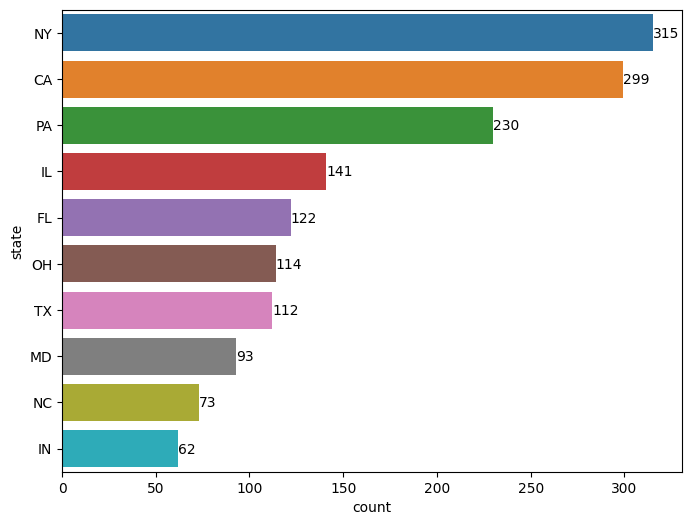

In [22]:
plt.figure(figsize=(8,6))
g = sns.countplot(y = 'state', data = pizza_clean ,
                  order=pizza_clean.state.value_counts().iloc[:10].index)

for index, value in enumerate(list(pizza_clean.state.value_counts().iloc[:10].values)):
    g.text(value , index + .1, str(value))

# 3. Average Pizza Price per State

In [23]:
pizza_clean.head()

,city,address,pizza_name,latitude,longitude,menus_amountMax,menus_amountMin,state,pizza_counts,state_counts
0,Bend,Cascade Village Mall Across From Target,Bianca Pizza,44.102665,-121.300797,22.50,15.50,OR,3,24.0
1,Bend,Cascade Village Mall Across From Target,Cheese Pizza,44.102665,-121.300797,18.95,18.95,OR,130,24.0
2,Los Angeles,148 S Barrington Ave,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,CA,1,326.0
3,Los Angeles,148 S Barrington Ave,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,CA,1,326.0
4,Los Angeles,148 S Barrington Ave,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,CA,1,326.0


In [24]:
pizza_clean['average_price'] = (pizza_clean['menus_amountMax'] + pizza_clean['menus_amountMin']) / 2
pizza_clean.head()

,city,address,pizza_name,latitude,longitude,menus_amountMax,menus_amountMin,state,pizza_counts,state_counts,average_price
0,Bend,Cascade Village Mall Across From Target,Bianca Pizza,44.102665,-121.300797,22.50,15.50,OR,3,24.0,19.00
1,Bend,Cascade Village Mall Across From Target,Cheese Pizza,44.102665,-121.300797,18.95,18.95,OR,130,24.0,18.95
2,Los Angeles,148 S Barrington Ave,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,CA,1,326.0,12.00
3,Los Angeles,148 S Barrington Ave,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,CA,1,326.0,13.00
4,Los Angeles,148 S Barrington Ave,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,CA,1,326.0,13.00


In [25]:
price_by_state = pizza_clean.groupby('state')['average_price'].mean().reset_index().sort_values(by = 'average_price', ascending = False).head(10)

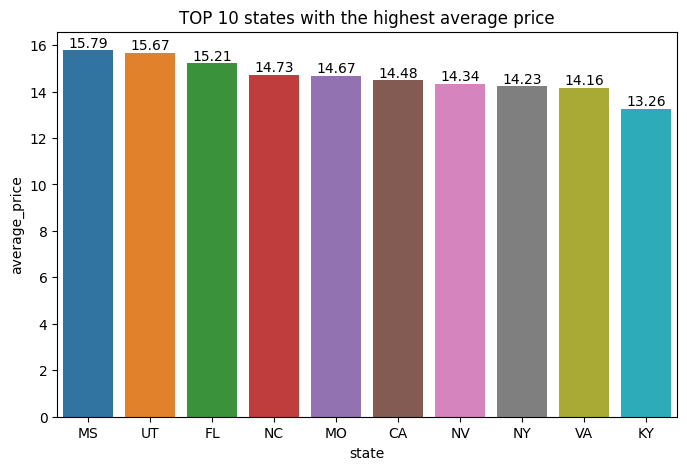

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(data=price_by_state, x='state', y='average_price')
plt.title("TOP 10 states with the highest average price")
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')
plt.show()

In [27]:
price_by_city = pizza_clean.groupby('city')['average_price'].mean().reset_index().sort_values(by = 'average_price', ascending = False).head(10)

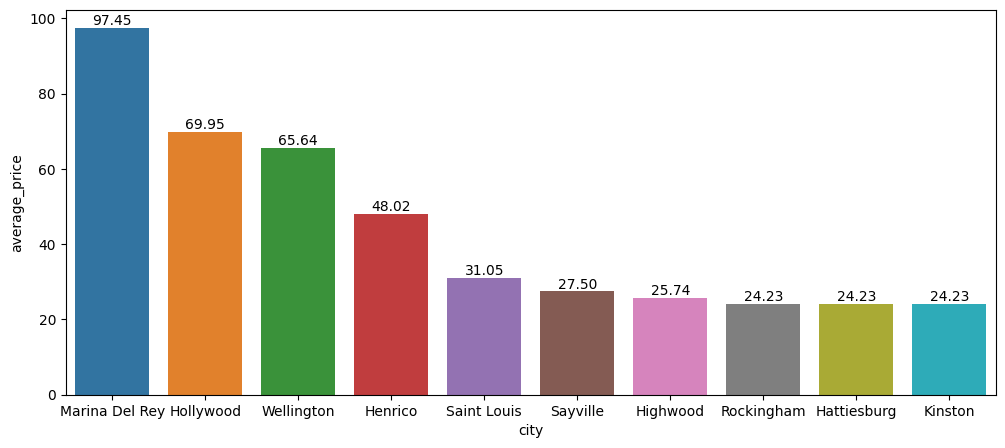

In [28]:
plt.figure(figsize=(12,5))
plot = sns.barplot(data=price_by_city, x='city', y='average_price')
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')
plt.show()

### Let's make some Pizza Maps

In [29]:
pizza.head()

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,22.50,...,USD,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,18.95,...,USD,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,12.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood
3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55.0,Brentwood
4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55.0,Brentwood


In [30]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergeo(
        lon = pizza['longitude'],
        lat = pizza['latitude'],
        text = pizza['name'],
        mode = 'markers'
        ))

fig.update_layout(
        title = 'Pizza Resturant Locations in the US',
        geo_scope='usa',
    )
fig.show()

### Pizza Resturants in each State Map

In [31]:
pizza_clean.head()

,city,address,pizza_name,latitude,longitude,menus_amountMax,menus_amountMin,state,pizza_counts,state_counts,average_price
0,Bend,Cascade Village Mall Across From Target,Bianca Pizza,44.102665,-121.300797,22.50,15.50,OR,3,24.0,19.00
1,Bend,Cascade Village Mall Across From Target,Cheese Pizza,44.102665,-121.300797,18.95,18.95,OR,130,24.0,18.95
2,Los Angeles,148 S Barrington Ave,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,CA,1,326.0,12.00
3,Los Angeles,148 S Barrington Ave,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,CA,1,326.0,13.00
4,Los Angeles,148 S Barrington Ave,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,CA,1,326.0,13.00


In [32]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=pizza_clean['state'],
    z=pizza_clean['state_counts'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=pizza_clean['state'],
    marker_line_color='white',
    colorbar_title="Number of Resturants"
))

fig.update_layout(
    title_text='Pizza Resturants in each US State',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True,
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()